<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> Exercise no. 6  </b></p>
</div>

---
# Advanced `groupby`, `cut`, `qcut`, `KDE` and `boxplot` Techniques

## Introduction

Two weeks ago, we explored the `groupby` function, learning various ways to group data while applying statistical functions. 

**Today, we will dive deeper into advanced techniques by combining `groupby` with additional tools like `cut`, `qcut`, and visualizations using `KDE`, `Histogram` and `boxplot`. These methods will help us gain deeper insights into grouped data and enhance our data analysis skills.**

### Objective of today's lesson:
1. **discretization :** `group by` continuous or interval ratio types of data into a categorical variable.
   - `cut`
   - `qcut`
3. **Learning graphs and their uses :**
    - `KDE` - Kernel Density Estimation.
    - `CDF` - Cumulative Distribution Function.
    - `ECDF` - Empirical Cumulative Distribution Function.
    - `boxplot`.

---
**Intuitive explanatory content for graphs inspired by Kimberly Fessel, PhD.**

---

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/titanic.csv'
titanic_df = pd.read_csv(url,encoding='latin1')

---
#### A common way to look at the distribution of a continuous number is through a graph called a `histogram`. [Read here for more](#https://seaborn.pydata.org/generated/seaborn.histplot.html)
A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

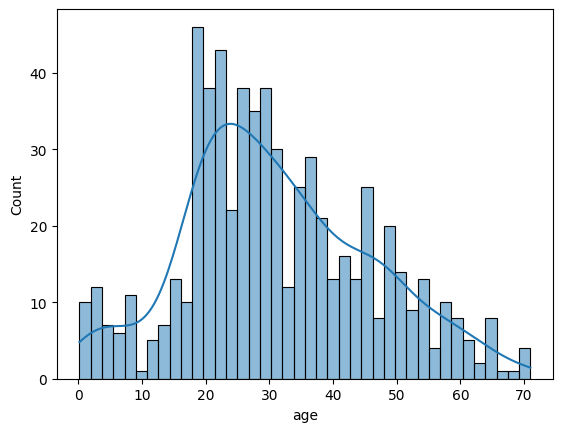

In [4]:
import seaborn as sns
sns.histplot(titanic_df['age'],bins = 40 ,kde= True);

---
<h1 style="background-color: #8EBAD9; 
            font-size: 2.5em; 
            color: #03112A;
            border-radius: 25px; 
            text-align: center; 
            padding: 20px; 
            font-family: 'Verdana', sans-serif; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
   <span style="font-weight: bold;">KDE:</span> <span style="font-weight: bold;">K</span>ernel <span style="font-weight: bold;">D</span>ensity <span style="font-weight: bold;">E</span>stimation
</h1>


### What is a KDE Graph?

A KDE (Kernel Density Estimation) graph is a visualization that estimates the probability density function of a **dataset**, providing a smooth, continuous curve to represent the distribution of data points.


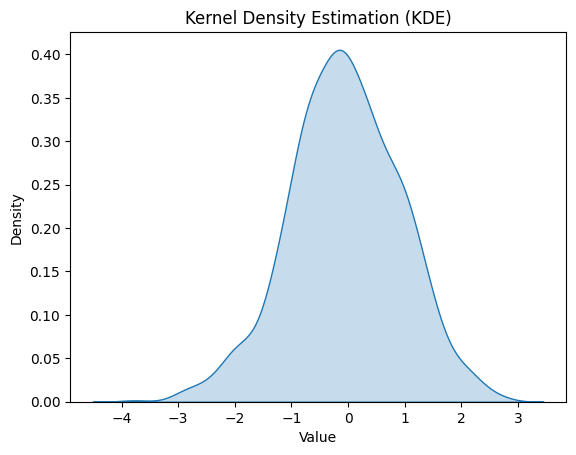

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(loc=0, scale=1, size=1000)

sns.kdeplot(data, fill=True)
plt.title("Kernel Density Estimation (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


### Advantages of KDE Over a Histogram

- **Continuity**: KDE produces a smooth and continuous curve, unlike histograms which have "jumps."
- **No dependency on bin count**: In histograms, choosing the wrong number of bins can distort the results.
- **High adaptability**: KDE adjusts better to the actual distribution of the data.

### Disadvantages

- **Choosing the bandwidth (h)**: Finding the optimal value can be challenging and often requires trial and error.
- **Sensitivity to outliers**: Extreme values can significantly affect the estimation.

### Common Uses

- **Exploratory Data Analysis (EDA)**: Identifying the shape of a data distribution.
- **Statistical and Machine Learning**: For example, clustering or anomaly detection.


---
### How does KDE work ?

In [6]:
import scipy.stats as stats
pts = [1, 3, 3.5, 4, 6, 8]

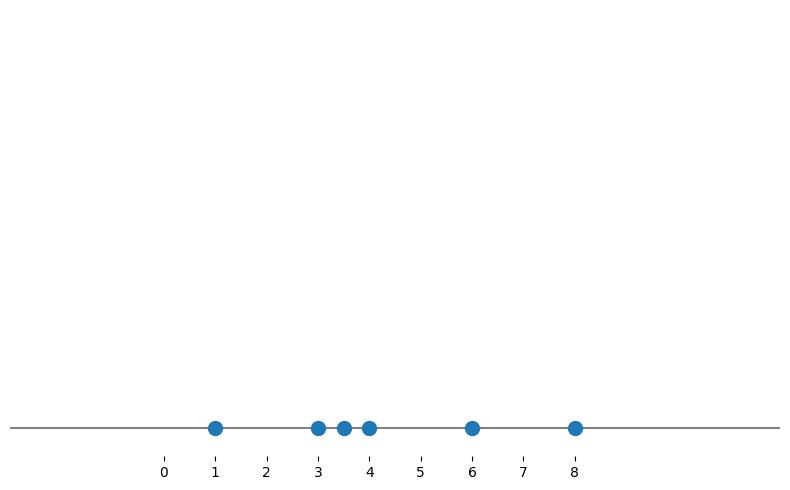

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, 1.5)
plt.xlim(-3, 12)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

### Step 1: Calc local density
![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/1png.png)

![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/2.png)

![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/3.png)

![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/4.png)

![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/5.png)

![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/6.png)


### Step 2: Add all local density together.
![Step 2 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/6.1.png)

![Step 2 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/6.2.png)

![Step 2 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/6.3.png)

![Step 2 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/6.4.png)

![Step 2 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/6.5.png)

![Step 2 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/e6a9d97f430ebc767dad39163dc47c82409319bc/Tirgul6/pics/6.6.png)


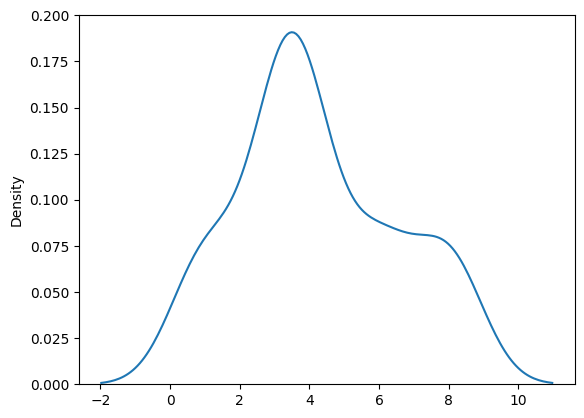

In [8]:
sns.kdeplot(pts,bw_adjust= 0.58);


---
### `bw_adjust` argument. 

In [9]:
import ipywidgets as widgets
from ipywidgets import interact


def plot_kde(bandwidth):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(pts, fill=True, bw_adjust=bandwidth)
    plt.title(f"KDE with Bandwidth = {bandwidth}")
    plt.xlabel("X")
    plt.ylabel("Density")  # כאן התיקון
    plt.grid(alpha=0.5)
    plt.show()

interact(plot_kde, bandwidth=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1));


interactive(children=(FloatSlider(value=1.0, description='bandwidth', max=2.0, min=0.1), Output()), _dom_class…

### **too small** Bandwidth = `UnderSmoothed`

### **too big** Bandwidth = `OverSmoothed`


---

In [10]:
from IPython.display import display, Math , Markdown

display(Markdown('### General Formula for KDE'))

# Displaying the KDE formula
display(Math(r"\hat{f}(x) = \frac{1}{n \cdot h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)"))
display(Math(r"Where: "))
display(Math(r"\hat{f}(x) \ : The \ estimated \ density \ at \ point \ x  "))
display(Math(r" n \ \ \ \ \ \ : The \ total \ number \ of \ data \ points.  "))
display(Math(r" h  \ \ \ \ \ \ : The \ bandwidth \ , \ which \ controls \ the \ smoothness.  "))
display(Math(r" x_i \ \ \ \ : \ The \ data \ points.  "))
display(Math(r"K(u) \ : \ The \ kernel \ function \ , \ which \ weights \ the \ contributions \ of \ points \ relative \ to \ x . "))


display(Markdown('### Common Kernel Functions'))

# Displaying the kernel functions
display(Math(r"1. \ \ \textbf{Gaussian Kernel:}"))
display(Math(r"K(u) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{u^2}{2}\right)"))

display(Math(r"2. \ \ \textbf{Uniform Kernel:}"))
display(Math(r"K(u) = \begin{cases} \frac{1}{2}, & \text{if } |u| \leq 1 \\ 0, & \text{if } |u| > 1 \end{cases}"))

display(Math(r"3. \ \ \textbf{Triangular Kernel:}"))
display(Math(r"K(u) = \begin{cases} 1 - |u|, & \text{if } |u| \leq 1 \\ 0, & \text{if } |u| > 1 \end{cases}"))


### General Formula for KDE

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Common Kernel Functions

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---
### `cumulative` argument.

According to KDE graph: The **area** of the curve sums up to 1

with `cumulative` argument we get  CDF graph ( **Theoretical** Cumulative Distribution Function) 


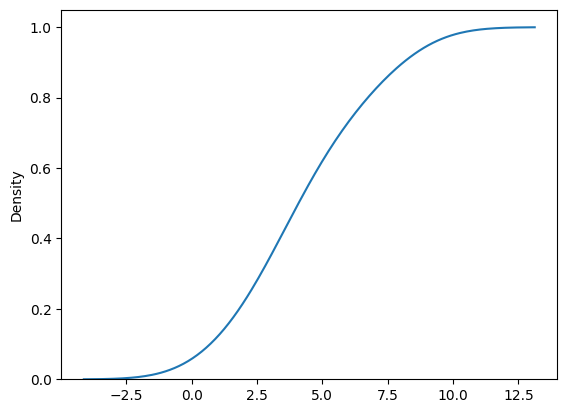

In [11]:
sns.kdeplot(pts, cumulative=True);

The `ECDF` function, on the other hand, is based on the data

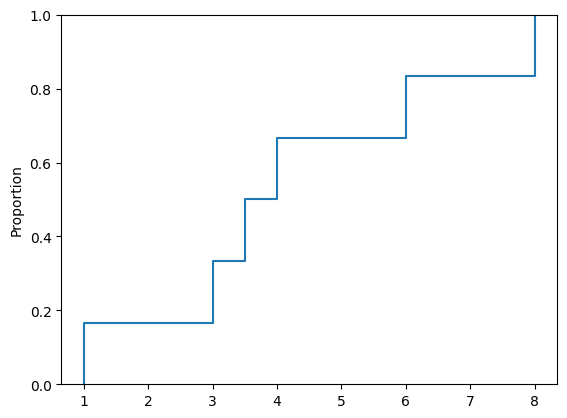

In [12]:
sns.ecdfplot(pts);

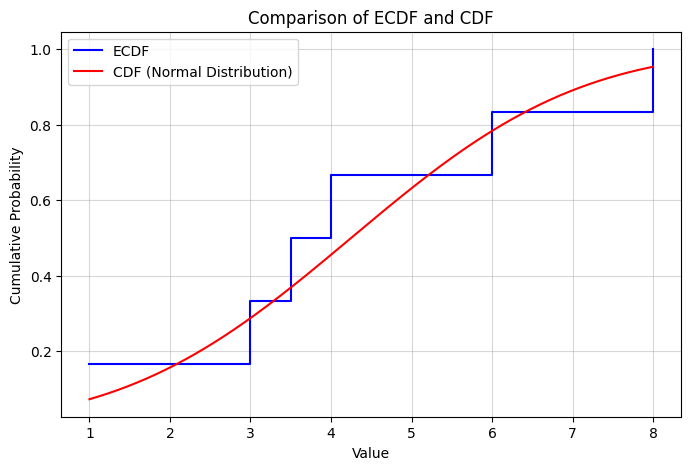

In [13]:
# Re-import necessary libraries after environment reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# נתוני דוגמה
pts = [1, 3, 3.5, 4, 6, 8]

# חישוב ECDF
x_ecdf = np.sort(pts)
y_ecdf = np.arange(1, len(pts) + 1) / len(pts)

# חישוב CDF (Normal Distribution) עם ממוצע וסטיית תקן של הנתונים
mean = np.mean(pts)
std = np.std(pts)
x_cdf = np.linspace(min(pts), max(pts), 1000)
y_cdf = norm.cdf(x_cdf, loc=mean, scale=std)

# גרף השוואה
plt.figure(figsize=(8, 5))

# ECDF
plt.step(x_ecdf, y_ecdf, where="post", label="ECDF", color="blue")

# CDF תיאורטית
plt.plot(x_cdf, y_cdf, label="CDF (Normal Distribution)", color="red")

# תוויות וכותרת
plt.title("Comparison of ECDF and CDF")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(alpha=0.5)

plt.show()


---
## So how do we group by a consecutive numeric column?
### By equal ranges in numbers **or** by the amount of values?

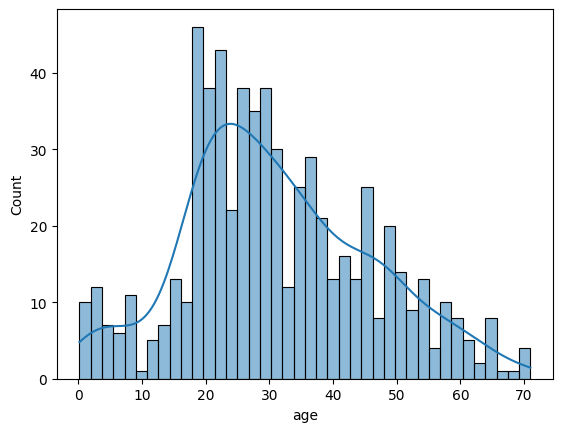

In [14]:
import seaborn as sns
sns.histplot(titanic_df['age'],bins = 40 ,kde= True);

In [15]:
titanic_df[['age']].describe().round()

,age
count,633.0
mean,31.0
std,15.0
min,0.0
25%,21.0
50%,30.0
75%,41.0
max,71.0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> |</span></b> Division by fixed numerical ranges - pd.cut</b></p>
</div>

In [16]:
titanic_df['age_bins'] = pd.cut(titanic_df['age'], bins = 3, labels = ('young', 'middle_age', 'old' )) # bins also accept intervals such as bins=range(0, 100, 10)

In [17]:
bins = pd.cut(titanic_df['age'], bins=3) #show intervals
print(bins.cat.categories)  

IntervalIndex([(0.0959, 23.778], (23.778, 47.389], (47.389, 71.0]], dtype='interval[float64, right]')


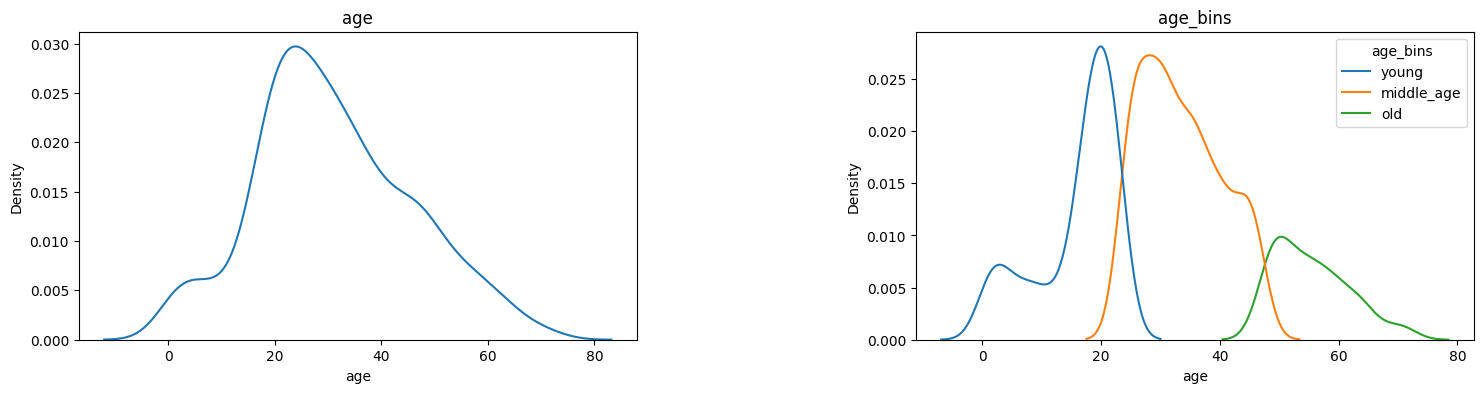

In [18]:
import matplotlib.pyplot as plt  #for reshaping graph size

fig, ax = plt.subplots(1,2, figsize = (18,4))
plt.subplots_adjust(wspace = 0.5)

sns.kdeplot(data = titanic_df,x='age', ax = ax[0]);
ax[0].set_title('age');

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins', ax = ax[1] );
ax[1].set_title('age_bins');


#### How many have survived now by age group?

In [19]:
titanic_df.groupby(['age_bins'], observed=False)['survived'].sum()

# what happen if :
# titanic_df.groupby(['age_bins']).sum()

# every numeric column will appear

age_bins
young         104
middle_age    130
old            47
Name: survived, dtype: int64

**Add `observed=False` to include the categories that did not receive values** 

Suppose the `age_bins` category contains the following ranges: ['young', 'middle_age', 'old'], but the data only contains values for the ranges `young` and `old`.

`observed=False`: The output will also include the `middle_age` category with a value of `0`, because it is part of the defined categories.

`observed=True`: The output will only include `young` and `old`, without categories that have no data.

##### Have we classified the ages correctly?
##### Suggest a way to check this.

In [20]:
age_group_stats = titanic_df.groupby('age_bins', observed=False)['age'].describe()
age_group_stats

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
young,209.0,15.946969,6.836041,0.1667,13.0,18.0,21.0,23.0
middle_age,325.0,33.596923,6.797829,24.0000,28.0,32.0,39.0,47.0
old,99.0,55.494949,6.255404,48.0000,50.0,54.0,60.0,71.0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> |</span></b> Division by an equal number of values - pd.qcut</b></p>
</div>

In [21]:
bins = pd.qcut(titanic_df['age'], q=3)
print(bins.cat.categories)

IntervalIndex([(0.166, 24.0], (24.0, 36.0], (36.0, 71.0]], dtype='interval[float64, right]')


In [22]:
titanic_df['age_bins_qcut'] = pd.qcut(titanic_df['age'], q=3, labels=['young', 'middle_age', 'old'])

Text(0.5, 1.0, 'age_bins')

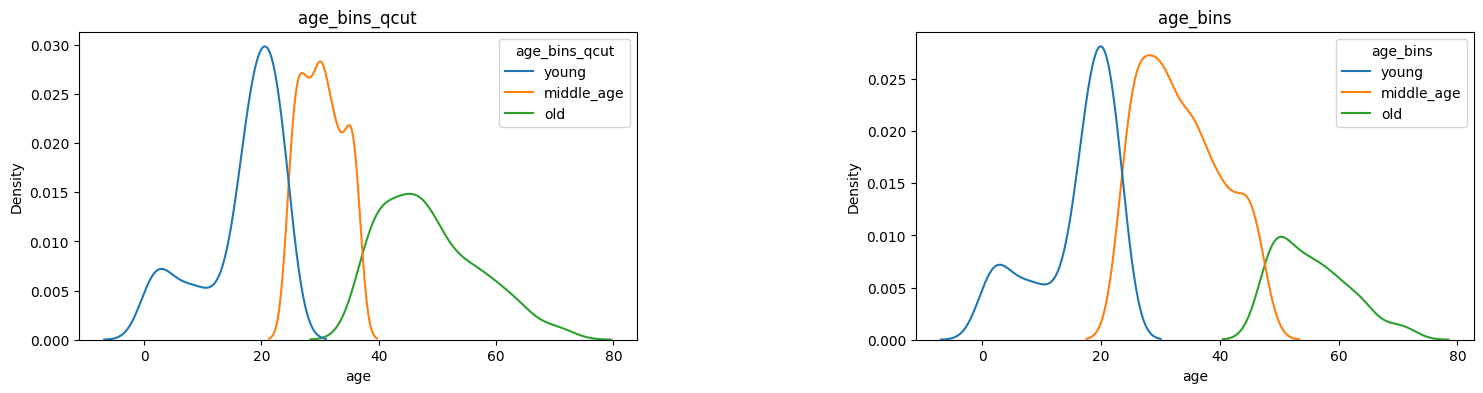

In [23]:
import matplotlib.pyplot as plt  #for reshaping graph size

fig, ax = plt.subplots(1,2, figsize = (18,4))
plt.subplots_adjust(wspace = 0.5)

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins_qcut', ax = ax[0] );
ax[0].set_title('age_bins_qcut');

sns.kdeplot(data = titanic_df,x='age',hue= 'age_bins', ax = ax[1]);
ax[1].set_title('age_bins')




### And now :

In [24]:
titanic_df.groupby(['age_bins_qcut'], observed=False)['survived'].sum()

age_bins_qcut
young         114
middle_age     82
old            85
Name: survived, dtype: int64

> Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the `DataFrame.agg()` method:

In [25]:
titanic_df.agg({"age": ["count","min", "max", "median", "skew"]})

,age
count,633.000000
min,0.166700
max,71.000000
median,30.000000
skew,0.302984


### `pd.cut` vs `pd.qcut`

In [27]:
age_group_stats

,count,mean,std,min,25%,50%,75%,max
age_bins,,,,,,,,
young,209.0,15.946969,6.836041,0.1667,13.0,18.0,21.0,23.0
middle_age,325.0,33.596923,6.797829,24.0000,28.0,32.0,39.0,47.0
old,99.0,55.494949,6.255404,48.0000,50.0,54.0,60.0,71.0


In [28]:
age_group_stats2 = titanic_df.groupby(['age_bins_qcut'], observed=False)['age'].describe()
age_group_stats2

,count,mean,std,min,25%,50%,75%,max
age_bins_qcut,,,,,,,,
young,231.0,16.713925,6.919096,0.1667,14.0,19.0,22.0,24.0
middle_age,201.0,30.348259,3.550790,25.0000,27.0,30.0,33.0,36.0
old,201.0,48.681592,8.328752,37.0000,42.0,47.0,54.0,71.0


In [36]:
age_group_stats3 = titanic_df.groupby(['age_bins','age_bins_qcut'], observed=False)['age'].describe()
age_group_stats3

count       mean       std      min   25%   50%  \
age_bins   age_bins_qcut                                                    
young      young          209.0  15.946969  6.836041   0.1667  13.0  18.0   
middle_age young           22.0  24.000000  0.000000  24.0000  24.0  24.0   
           middle_age     201.0  30.348259  3.550790  25.0000  27.0  30.0   
           old            102.0  42.068627  3.118961  37.0000  39.0  42.0   
old        old             99.0  55.494949  6.255404  48.0000  50.0  54.0   

                           75%   max  
age_bins   age_bins_qcut              
young      young          21.0  23.0  
middle_age young          24.0  24.0  
           middle_age     33.0  36.0  
           old            45.0  47.0  
old        old            60.0  71.0

### **1. `pd.cut` - Division into Fixed Numerical Ranges**

#### When to Use:

- Use when you want to divide data into **fixed numerical ranges**, not by the number of values.
- Suitable for data with a **relatively uniform distribution**, meaning there isn’t a high concentration of values in specific ranges.
- Ideal for analyzing specific numerical ranges, such as:
  - Age ranges (e.g., 0-20, 20-40, 40-60).
  - Known financial intervals.

#### Example for Using `pd.cut`:

Suppose you have Titanic passengers' ages (ranging from 0 to 80), and most passengers are evenly spread across this range. If you divide the ages into 3 bins, the division would look like this:

- **Bin 1 (0-27):** Young passengers.
- **Bin 2 (27-53):** Middle-aged passengers.
- **Bin 3 (53-80):** Older passengers.

**Advantage**: Easy to interpret the meaning of each range in numerical terms.  
**Disadvantage**: If most passengers are young (e.g., 80% are between 0-27), this range will be "overcrowded," making it hard to analyze the entire population fairly.

---

### **2. `pd.qcut` - Division into Equal-Sized Groups**

#### When to Use:

- Use when you want to divide the data into bins with an **equal number of values**.
- Suitable for data with a **non-uniform distribution**, where values are concentrated in specific ranges.
- Ideal for creating balanced groups that represent **quantiles** (e.g., terciles or quartiles).


#### Example for Using `pd.qcut`:

Using the same Titanic age data, suppose 80% of passengers are aged 0-27, and only 20% are aged 27-80. If you use `pd.qcut` to divide the data into 3 bins, the division would look like this:

- **Bin 1 (0-15):** The first tercile of passengers (very young).
- **Bin 2 (15-30):** The second tercile (slightly older).
- **Bin 3 (30-80):** The last tercile (older passengers).

**Advantage**: Each bin contains an equal number of passengers, even if the distribution is uneven.  
**Disadvantage**: The numerical ranges may be harder to interpret intuitively (e.g., uneven ranges like 0-15, 15-30).

---

### **Comparison Between the Two Methods**

| **Feature**                    | **`pd.cut`**                              | **`pd.qcut`**                             |
|--------------------------------|-------------------------------------------|-------------------------------------------|
| **Division by ranges**         | Divides into equal numerical ranges.       | Divides into ranges with equal number of values. |
| **Number of values per range** | May vary across ranges.                    | Almost equal in every category.           |
| **Use case**                   | Analysis based on fixed numerical ranges.  | Analysis based on equal-sized groups.     |
| **Suitable for data distribution** | Uniform or near-uniform distribution.      | Non-uniform distribution or with dense clusters. |

---
### A quick visual way to display data grouping results `.plot()`

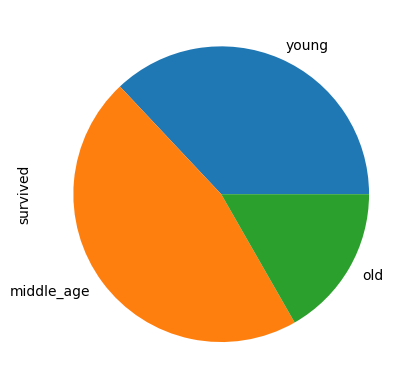

In [27]:
titanic_df.groupby(['age_bins'], observed=False)['survived'].sum().plot(kind = 'pie');

---
<h1 style="background-color: #8EBAD9; 
            font-size: 2.5em; 
            color: #03112A;
            border-radius: 25px; 
            text-align: center; 
            padding: 20px; 
            font-family: 'Verdana', sans-serif; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
   <span style="font-weight: bold;">Boxplot</span> 
</h1>


In [34]:
import seaborn as sns  # for creating the graphs
import matplotlib.pyplot as plt  #for reshaping graph size
import numpy as np
import random

Check the [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for even more styling options

Read more about [here](https://chartio.com/learn/charts/box-plot-complete-guide/#best-practices-for-using-a-box-plot)

<a id='section1'></a>

<h1 style="background-color: #FFFFFF; color: #0046d6; border-radius: 10px; text-align: center; 
<div class="image-container">
  <img src= "https://github.com/Razelbaz1/exercises-package/blob/master/pics/boxplot.png?raw=true"
    alt="Centered Image" width="800" height="200" /> </div>


## How It Works

---

In [35]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [36]:
blue, orange, green, red = sns.color_palette()[:4]

#### Suppose we have a list of values.

In [37]:
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

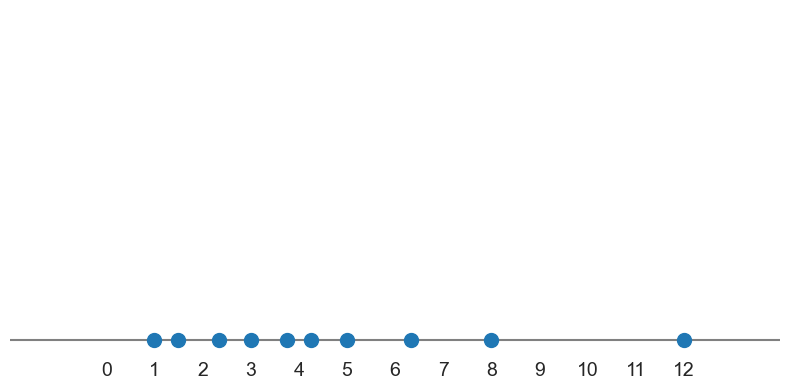

In [38]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=blue)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

### Draw the median
![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/7b0ebde6d82711811e86d73da8d074c925b83c97/Tirgul6/boxplot_pics/1.png)

### Draw the 25th percentile
![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/7b0ebde6d82711811e86d73da8d074c925b83c97/Tirgul6/boxplot_pics/2.png)

### raw the 25th percentile on the other side that now represent the 75th percentile
![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/7b0ebde6d82711811e86d73da8d074c925b83c97/Tirgul6/boxplot_pics/3.png)

### Connect the lines and paint
![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/7b0ebde6d82711811e86d73da8d074c925b83c97/Tirgul6/boxplot_pics/4.png)

### Add upper & lower whiskers.
![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/7b0ebde6d82711811e86d73da8d074c925b83c97/Tirgul6/boxplot_pics/5.png)

### Add outlier
![Step 1 Explanation](https://raw.githubusercontent.com/Razelbaz1/exercises-package/7b0ebde6d82711811e86d73da8d074c925b83c97/Tirgul6/boxplot_pics/6.png)

#### check manual against seaborn plot.

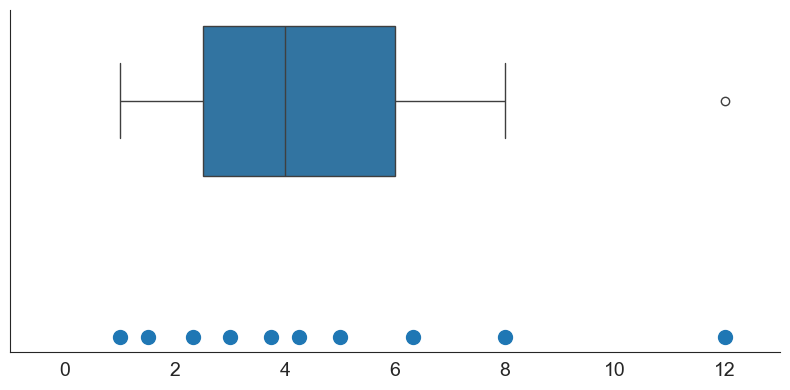

In [49]:
plt.figure(figsize=(8,4))
sns.boxplot(x = pts, color=blue, width=0.3,)
plt.scatter(pts, [0.47]*len(pts), s=100, zorder=10, color=blue)
sns.despine()
plt.xlim(-1, 13)


plt.tight_layout();

#### And in general a box plot will be obtained from the following form.

<div class="image-container">
  <img src= "https://github.com/Razelbaz1/exercises-package/blob/master/pics/box-plot-construction.png?raw=true"
    alt="Centered Image" width="800" height="200" /> </div>
